In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy    as np
import os.path
import pandas   as pd
import random   as rand
import seaborn  as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
train_df = pd.read_csv('../../data/processed/wroclawski-rower-miejski/train.csv', parse_dates=['date']) 
test_df = pd.read_csv('../../data/processed/wroclawski-rower-miejski/train.csv', parse_dates=['date']) 

In [6]:
train_df.head(2)

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description,is_na_filled,rentals_no,is_weekend,bank_holidays,is_not_working_day,month
0,2015-04-28 11:00:00,14.179,14.179,14.179,999.0,84.0,4.0,333.0,92.0,Rain,light rain,0,6.0,False,False,False,Apr
1,2015-04-28 12:00:00,14.179,14.179,14.179,999.0,84.0,4.0,333.0,92.0,Rain,light rain,1,38.0,False,False,False,Apr


In [9]:
train_df.tail(2)

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description,is_na_filled,rentals_no,is_weekend,bank_holidays,is_not_working_day,month
9203,2016-08-14 22:00:00,14.82,13.33,17.22,1020.0,70.0,2.0,300.0,0.0,Clear,Sky is Clear,0,193.0,True,False,True,Aug
9204,2016-08-14 23:00:00,13.32,11.67,14.44,1020.0,77.0,2.0,300.0,0.0,Clear,Sky is Clear,0,191.0,True,False,True,Aug


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 17 columns):
date                   9205 non-null datetime64[ns]
temp                   9205 non-null float64
temp_min               9205 non-null float64
temp_max               9205 non-null float64
pressure               9205 non-null float64
humidity               9205 non-null float64
wind_speed             9205 non-null float64
wind_deg               9205 non-null float64
clouds_all             9205 non-null float64
weather_main           9205 non-null object
weather_description    9205 non-null object
is_na_filled           9205 non-null int64
rentals_no             9205 non-null float64
is_weekend             9205 non-null bool
bank_holidays          9205 non-null bool
is_not_working_day     9205 non-null bool
month                  9205 non-null object
dtypes: bool(3), datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 1.0+ MB


### Bike rentals over time

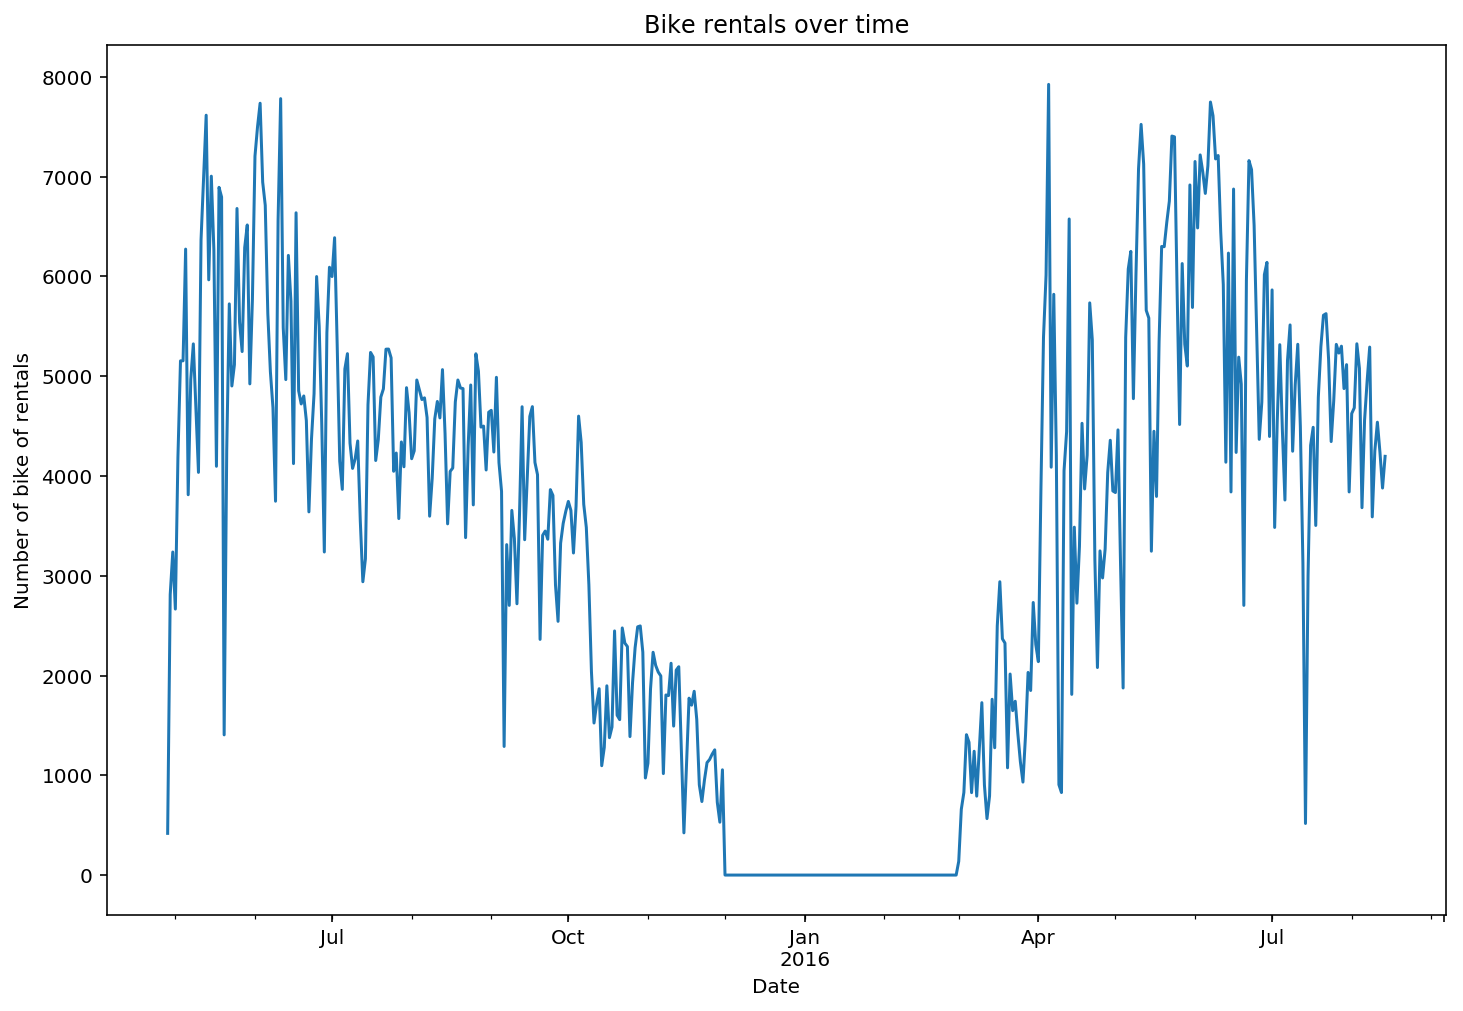

In [10]:
df  = train_df['rentals_no']
df.index = train_df['date']

ax = df.resample('D').sum().plot(figsize=(12,8), 
                                 title='Bike rentals over time');
ax.set_xlabel("Date")
ax.set_ylabel("Number of bike of rentals");